In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import strptime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data as panda data fram. I choose the bank-full because it is the complete dataset.
df1=pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
#check the head of data
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Checking type of data and missing value


In [4]:
#check the information of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df2=df1

In [6]:
#change the type pf data based on the type of information we have
#we should change the type of these columns to category
for col in ['job','marital','education','contact','poutcome','month']:
    df2[col] = df2[col].astype('category')

In [7]:
# there are 4 columns which is binary and we have two choice:
#first, the second option could be use in machine learning and we can change yes/no to 1/0.
#second, we can change type to bool and the data will change to True/False
#( I will keep data based on this code because we are not sure about the method that will be apply on this data)
for col in ['default','loan','housing','y']:
        pd.Series(np.where(df1.loan.values == 'yes', 1, 0),
          df1.index)

In [8]:
# there are 4 columns which is binary and we have two choice we can change type to bool and the data will change to True/False
# the second option could be use in machine learning and we can change yes/no to 1/0.
for col in ['default','loan','housing','y']:
    df2[col] = df2[col].astype('bool')

In [9]:
df2.dtypes

age             int64
job          category
marital      category
education    category
default          bool
balance         int64
housing          bool
loan             bool
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y                bool
dtype: object

In [10]:
df2['balance']=df2['balance'].astype(float)
df2['balance'].head()

0    2143.0
1      29.0
2       2.0
3    1506.0
4       1.0
Name: balance, dtype: float64

In [11]:
#cheking missing value

missing_values_count = df2.isnull().sum()

# look at the missing points in the first ten columns
missing_values_count[:]

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
#just double check the percentage of missing value in the whole dataset
total_cells = np.product(df2.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0

by double checking missing value and reading readme, there is no missing value in our dataset!

In [13]:
#drop the rows with more than two non value if there is any.
df2.dropna(thresh=2).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,True,2143.0,True,True,unknown,5,may,261,1,-1,0,unknown,True
1,44,technician,single,secondary,True,29.0,True,True,unknown,5,may,151,1,-1,0,unknown,True
2,33,entrepreneur,married,secondary,True,2.0,True,True,unknown,5,may,76,1,-1,0,unknown,True
3,47,blue-collar,married,unknown,True,1506.0,True,True,unknown,5,may,92,1,-1,0,unknown,True
4,33,unknown,single,unknown,True,1.0,True,True,unknown,5,may,198,1,-1,0,unknown,True


In [14]:
#Drop any repetation by rows
duplicateRowsDF = df2[df2.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


# Check the anomaly/extreme value

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc24cd6668>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc24cd6fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc24cd64e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc24cea860>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc24ceacc0>],
 'means': []}

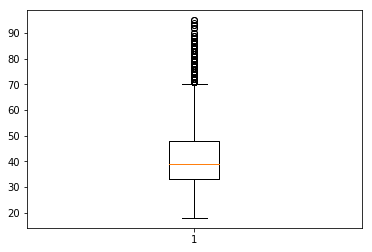

In [15]:
#test outier with boxpot and 
plt.boxplot(df2['age'])

It sounds resonable. There is no value far from other value in this plot. So we do not have any anomaly/extreme value in this column.


{'whiskers': [<matplotlib.lines.Line2D at 0x1bc24d66b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc24d724e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc24d669b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc24d72da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc24d79240>],
 'means': []}

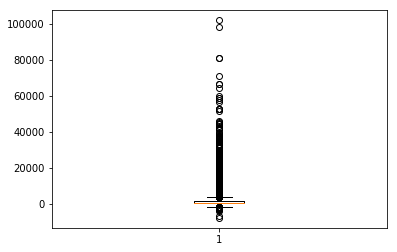

In [16]:
plt.boxplot(df2['balance'])

There is no value far from other value in this plot. So we do not have any anomaly/extreme value in this column.
I could droped the two maximum but they are not really very far from the other data, so I decided to keep them.

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc24dc74e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc24dc7e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc24dc7390>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc24dd0780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc24dd0be0>],
 'means': []}

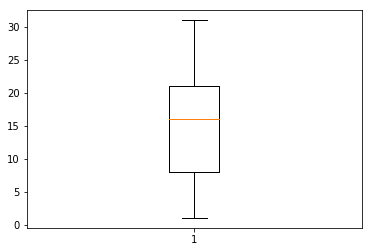

In [17]:
plt.boxplot(df2['day'])

There is no value far from other value in this plot. So we do not have any anomaly/extreme value in this column.

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc252fb358>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc252fbcf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc252fb208>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc253045f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc25304a58>],
 'means': []}

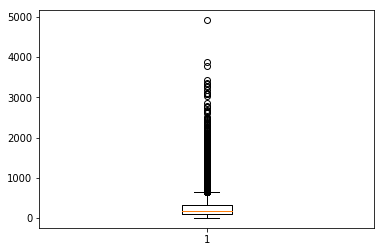

In [18]:
plt.boxplot(df2['duration'])

There is no value far from other value in this plot. So we do not have any anomaly/extreme value in this column.

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc25351828>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc2535c208>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc253516d8>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc2535cac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc2535cf28>],
 'means': []}

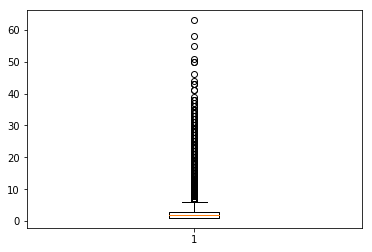

In [19]:
plt.boxplot(df2['campaign'])

There is no value far from other value in this plot. So we do not have any anomaly/extreme value in this column.

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc253b01d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc253b0b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc253b0080>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc253ba470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc253ba8d0>],
 'means': []}

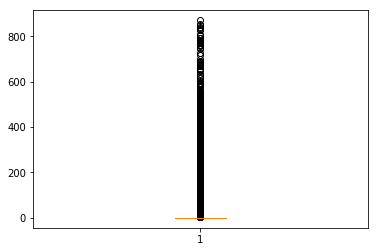

In [20]:
plt.boxplot(df2['pdays'])

There is no value far from other value in this plot. So we do not have any anomaly/extreme value in this column.

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc2540b0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc2540ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc253fff60>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc25413390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc254137f0>],
 'means': []}

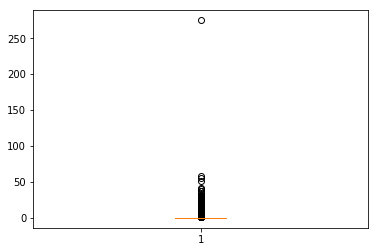

In [21]:
plt.boxplot(df2['previous'])

In [22]:
df2['previous']=df2['previous'].replace(df2['previous'].max(),df2['previous'].mean())

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc24a732b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc24a73c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc24a73160>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc24a7b550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc24a7b9b0>],
 'means': []}

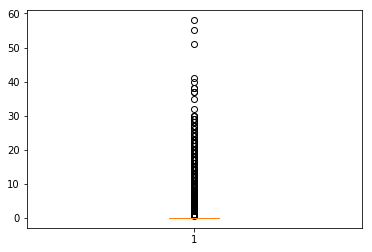

In [23]:
plt.boxplot(df2['previous'])

There is no value far from other value in this plot. So we do not have any anomaly/extreme value in this column any more.

# Make a new column for date

In this part we can follow two approach:

1) Just keep the name of month and join them as a new column by name 'date'h

2) change the name of month to numeric and join the day and month number as a new column by name 'date'. Then by refer to the readme of the csv file with two simple step we can create the datetime column wich is very valuable for analysis data.

In [24]:
#joining the month and day columns and save it in new coulmn name 'date'
#This is the first approach and if we have no access to year we should continue cleaning with this  approach!
df2['Date']=df2.apply(lambda x:'%s - %s' % (x['month'], x['day']),axis=1)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Date
0,58,management,married,tertiary,True,2143.0,True,True,unknown,5,may,261,1,-1,0.0,unknown,True,may - 5
1,44,technician,single,secondary,True,29.0,True,True,unknown,5,may,151,1,-1,0.0,unknown,True,may - 5
2,33,entrepreneur,married,secondary,True,2.0,True,True,unknown,5,may,76,1,-1,0.0,unknown,True,may - 5
3,47,blue-collar,married,unknown,True,1506.0,True,True,unknown,5,may,92,1,-1,0.0,unknown,True,may - 5
4,33,unknown,single,unknown,True,1.0,True,True,unknown,5,may,198,1,-1,0.0,unknown,True,may - 5


#  Change the name of month to number

In [25]:
#apply the function on the entire month column 
# we change the name of month to the numeric to be more usable in functions
df3=df2
df3['month'] = df3['month'].apply(lambda x:strptime(x,'%b').tm_mon)
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Date
0,58,management,married,tertiary,True,2143.0,True,True,unknown,5,5,261,1,-1,0.0,unknown,True,may - 5
1,44,technician,single,secondary,True,29.0,True,True,unknown,5,5,151,1,-1,0.0,unknown,True,may - 5
2,33,entrepreneur,married,secondary,True,2.0,True,True,unknown,5,5,76,1,-1,0.0,unknown,True,may - 5
3,47,blue-collar,married,unknown,True,1506.0,True,True,unknown,5,5,92,1,-1,0.0,unknown,True,may - 5
4,33,unknown,single,unknown,True,1.0,True,True,unknown,5,5,198,1,-1,0.0,unknown,True,may - 5


# Creating datetime based on the information from readme

In [26]:
#findign the last year f 2008 in data based on the information in readme
#which says data is ordered by date from may 2008 to nov 2010
df2[(df2['month']==12) & (df2['day']==27)]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Date
27728,28,admin.,single,secondary,True,6100.0,True,True,unknown,27,12,333,1,-1,0.0,unknown,True,dec - 27


In [27]:
#find the next last day of year 2009
df2[(df2['month']==12) & (df2['day']==31)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Date
42590,32,technician,married,unknown,True,14533.0,True,True,cellular,31,12,646,3,198,2.0,success,True,dec - 31


In [28]:
#make new dataframe
df4=df3

In [29]:
#create new column
df4['year']=2008
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Date,year
0,58,management,married,tertiary,True,2143.0,True,True,unknown,5,5,261,1,-1,0.0,unknown,True,may - 5,2008
1,44,technician,single,secondary,True,29.0,True,True,unknown,5,5,151,1,-1,0.0,unknown,True,may - 5,2008
2,33,entrepreneur,married,secondary,True,2.0,True,True,unknown,5,5,76,1,-1,0.0,unknown,True,may - 5,2008
3,47,blue-collar,married,unknown,True,1506.0,True,True,unknown,5,5,92,1,-1,0.0,unknown,True,may - 5,2008
4,33,unknown,single,unknown,True,1.0,True,True,unknown,5,5,198,1,-1,0.0,unknown,True,may - 5,2008


In [30]:
#finiding the number of the row of the last day of 2008 and fill it by 2008
df4['year'][:27728]=2008

In [31]:
#finiding the number of the row of the last day of 2009 and fill it by 2008
df4['year'][27729:42591]=2009

In [32]:
#the rest of data belongs to 2010
df4['year'][42591:]=2010

In [33]:
#join the three columns of day, month, year to make a datatime
df4['date']=pd.to_datetime(df4[['year', 'month', 'day']].rename(columns={'year': 'year', 'month': 'month', 'day': 'day'}))

In [34]:
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Date,year,date
0,58,management,married,tertiary,True,2143.0,True,True,unknown,5,5,261,1,-1,0.0,unknown,True,may - 5,2008,2008-05-05
1,44,technician,single,secondary,True,29.0,True,True,unknown,5,5,151,1,-1,0.0,unknown,True,may - 5,2008,2008-05-05
2,33,entrepreneur,married,secondary,True,2.0,True,True,unknown,5,5,76,1,-1,0.0,unknown,True,may - 5,2008,2008-05-05
3,47,blue-collar,married,unknown,True,1506.0,True,True,unknown,5,5,92,1,-1,0.0,unknown,True,may - 5,2008,2008-05-05
4,33,unknown,single,unknown,True,1.0,True,True,unknown,5,5,198,1,-1,0.0,unknown,True,may - 5,2008,2008-05-05


I am creating datetime very beautiful!!!!!!!

In [35]:
#check the type of data and we can see we have datetime format !!!!
df4.dtypes

age                   int64
job                category
marital            category
education          category
default                bool
balance             float64
housing                bool
loan                   bool
contact            category
day                   int64
month              category
duration              int64
campaign              int64
pdays                 int64
previous            float64
poutcome           category
y                      bool
Date                 object
year                  int64
date         datetime64[ns]
dtype: object

# find the percentage of each categories in each column

In [36]:
#checking for unnecessary feature in the categoriy coulmns
df4['poutcome'].value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

This column has more than 80% in unknown category. it seems we cannot have good analysis by less than 10 % of information so I decided to drope this column.

In [37]:
df4['contact'].value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [38]:
df4['job'].value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [39]:
df4['marital'].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [40]:
df4['education'].value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

In [41]:
#by looking at the percentage of all categories in poutcome we recognize that more than 80% of data is unknown
# So, we cannot have a very good indight with 10% of other categories (it does not mean unknowm categories has not any information)
#for saving in the csv file I dropped Date as well because I just want to keep datetime in my dataset.
df5=df4.drop(['poutcome','day','month','year','Date'],axis=1)
#change the name of 'y' column to be more meaningfu
df5.rename(columns={'y':'subscribe'}, 
                 inplace=True)
df5.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,subscribe,date
0,58,management,married,tertiary,True,2143.0,True,True,unknown,261,1,-1,0.0,True,2008-05-05
1,44,technician,single,secondary,True,29.0,True,True,unknown,151,1,-1,0.0,True,2008-05-05
2,33,entrepreneur,married,secondary,True,2.0,True,True,unknown,76,1,-1,0.0,True,2008-05-05
3,47,blue-collar,married,unknown,True,1506.0,True,True,unknown,92,1,-1,0.0,True,2008-05-05
4,33,unknown,single,unknown,True,1.0,True,True,unknown,198,1,-1,0.0,True,2008-05-05


In [42]:
df5.to_csv('Cleanbankfull.csv',index=False)

# Conclusion

Cleaning Data need some assumptions such as method and based on those methods and assumptions, we can clean the data much better than cleaning without any clue.

based on suggestions that provided by ELU, I tried to apply some of them on our data :

1) First suggestion can be done ddifferenty based on the method and approach we will apply on data, for example we can change the type of balance to float but I saw there is no decimal value soit is not necessary to change it here!.( most of the time price is float type)

2) I checked many fomula for finding outlier but most of them show many outliers which is not resonable based of our data. For example, in the balance and duration we have many outlier based on quartes but I decided to not take it into account as outlier because we will lost the real information with replacing them with fake information.

3) The only column that was not very useful was poutcome which has the highest frequency in 'unknown' category, so I decided to droped it. Also, As I create new column by name 'date', I dropped 'day' and 'month' and'year' as well.

4) The readme file in the data package informed us about there is no missing value and I just double checked it and there is no missing value so we cannot remove any rows based on this assumption.

**notice: I create new column name 'year' based on the information from Readme file. without that information, creating the year is not necessary and there is a chance for making mistake!